# Machine Learning Portfolio Project

## Automobile Industry-Ontario Used Cars

#### WecloudData Data Science Cohort B9-James Zhao

-------------------------


## Procedures

General Project Process
    
1. Industry Problem Definition
2. Data Collection/Acquisition
3. Data Cleaning & Preparation
4. Data Exploration/Feature Engineering
5. Modeling & Tuning
6. Model Interpretation
7. Model deployment, real life example

# 1. Industry Problem Definition

Ontariocars is an industry that collects used and new cars from various automobile brands and seek for customers who are looking for a new or used vehicle. 

The main focus is on used vehicles, new vehicles are generally expensive and the performance and price ratio are very low, due to the high prices. Most of the customers want economic and performance efficient vehicles, therefore, used vehicles with good maintenance conditions are more popular in the auto trade market. 

Along with world development, the average income for families has grown, the demand of vehicles appeared continuous growth, however, most of the families do not want to spend much on a new vehicle, because it is unnecessary.

Additional factors, such as a rise in income levels, increasing demand for luxury cars, shorter car ownership periods, booming import-export and a growing preference of two-wheeler owners to upgrade to small and compact cars are driving the growth of the market.

However, lack of financing or expensive financing options in many countries for used cars is expected to hinder the growth of the market. While finance for new cars is easy to obtain, used cars attract a higher rate of interest and are not sanctioned so easily. However, with the gradual growth in the organized sector, the market situation is changing. Major players, like Toyota, BMW, Maruti Suzuki, etc., have ventured into the used-car space in India. On global level, OEMs such as Volkswagen and Daimler have backed online vehicle sales startup such as Heycar in 2017 and 2018.

### The main business question is how can the used car sellers decide the price of their new or used vehicles based on the conditions and features of their vehicles, they have to figure out a reasonable price that satisfy both seller and purchaser. This is a linear regression problem most likely



In this Project, I am using a dataset based on web scraping from ontariocars.ca, which includes about 25 thousand vehicle entries and 28 features.

First, a lot of the vehicles do not have all features filled, such as interior and exterior color, these rows are either needed to be cleaned or feature engineered. 

Second, a lot of the string columns are needed to covert into numeric

Most importantly, under the price column, there are a lot of entries labelled as Call, that means the price is negotiable via phone calls. This portion of data is the portion that need to be predicted by the model, whenever the price is unsure, the power of model can predict a reasonable price. 

# 2. Data Collection

The dataset used for this project is generated by webscraping from the website ontariocars.ca, which contains many used cars for sale within the Ontario domain. 

The scraping method is using the beautiful soup package

There are 40 locations in total, which the scraping generates 40 csv files

This dataset is the updated dataset from my webscraping project

# 3. Data Import and Cleaning

In [1]:
import pandas as pd
import csv
import re
import datetime
import numpy as np

##### From the Previous Webscraping Project, there are about 40 locations in ontario, the below steps are read all the csvs regarding to locations, and then concat them, save the giant table again into another csv

cities=['Aurora','Barrie','Belleville','Brampton','Brantford','Brockville','Burlington','Caledon','Cambridge','Cayuga',\
        'Chatham-Kent','Cornwall','Essex','Guelph','Hamilton','Kingston','Kitchener','London','Markham','Milton',\
        'Mississauga','Newmarket','Niagara+Falls','North+York','Oakville','Oshawa','Ottawa','Pembroke','Peterborough',\
        'Richmond+Hill','Sarnia','St.+Catharines','Stratford','Sudbury','Thunder+Bay','Toronto','Vaughan','Waterloo',\
        'Whitby','Windsor']

city_tables=[]
for city in cities:
    city=pd.read_csv(f'C:/Users/james/Desktop/Wecloud_Data_Bootcamp/tables/{city}.csv', encoding='latin-1')
    city_tables.append(city)

df=pd.concat(city_tables,axis=0)

df.to_csv(r'C:/Users/james/Desktop/Wecloud_Data_Bootcamp/tables/ontario_cars.csv', index = False)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(f'C:/Users/james/Desktop/Wecloud_Data_Bootcamp/tables/ontario_cars.csv')

In [4]:
df.shape

(26268, 16)

In [5]:
df.head(10)
#Columns are basic features

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,passenger,transmission,drive_type,displacement,cylinder,fuel
0,2016,Toyota,Corolla,Aurora,"$13,888","42,098",Sedan,-,-,4,5,Automatic,FWD,1.8L,4,Gasoline
1,2017,Dodge,Grand,Aurora,"$17,885","57,100",-,-,-,-,-,Automatic,-,#NAME?,-,-
2,2017,Toyota,Camry,Aurora,"$22,888","95,532",Sedan,White,Gray,4,5,Automatic,FWD,2.5L,4,Gasoline
3,2016,Toyota,Camry,Aurora,"$19,888","48,315",Sedan,White,Black,4,5,Automatic,FWD,2.5L,4,Gasoline
4,2009,Dodge,Grand,Aurora,"$5,395","179,686",-,-,Gray,5,7,Automatic,FWD,#NAME?,-,Gasoline
5,2020,Hyundai,Elantra,Aurora,"$17,988","11,719",Sedan,White,Black,4,5,Automatic,FWD,2.0L,4,Gasoline
6,2015,Dodge,Durango,Aurora,"$24,988","88,392",SUV,White,Black,5,7,Automatic,AWD,3.6L,6,Gasoline
7,2010,Dodge,Grand,Aurora,"$6,885","150,255",-,Black,Black,4,7,Automatic,FWD,#NAME?,-,Gasoline
8,2010,Toyota,Corolla,Aurora,"$5,885","135,100",Sedan,-,Black,4,5,Manual,FWD,#NAME?,-,Gasoline
9,2018,Acura,ILX,Aurora,"$25,988","13,054",Sedan,White,Black,4,5,Automatic,FWD,2.4L,4,Gasoline


In [6]:
df = df.replace('-', np.nan)

In [7]:
df.isna().sum()

year                   0
brand                  1
model                  1
location               0
price                  0
mileage              371
body_type            711
exterior_colour     4788
interior_colour    10625
door                 401
passenger           1099
transmission        1180
drive_type           428
displacement         158
cylinder             718
fuel                 396
dtype: int64

In [8]:
a = df['location'].unique()
a

array(['Aurora', 'Barrie', 'Belleville', 'Brampton', 'Brantford',
       'Brockville', 'Burlington', 'Caledon', 'Cambridge', 'Cayuga',
       'Chatham-Kent', 'Cornwall', 'Essex', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener', 'London', 'Markham', 'Milton',
       'Mississauga', 'Newmarket', 'Falls', 'York', 'Oakville', 'Oshawa',
       'Ottawa', 'Pembroke', 'Peterborough', 'Hill', 'Sarnia',
       'Catharines', 'Stratford', 'Sudbury', 'Bay', 'Toronto', 'Vaughan',
       'Waterloo', 'Whitby', 'Windsor'], dtype=object)

### 3.1 Manipulate Primary Features

In [9]:
# Clear numeric like columns to remove unnecessary str
df['price']=df['price'].str.strip('$').str.replace(',','')
df['mileage']=df['mileage'].str.replace(',','')
df['displacement']=df['displacement'].str.replace('L','')

In [10]:
# remove the rows without price and mileage

is_price_numeric=df['price'].str.isnumeric()
is_mileage_numeric=df['mileage'].str.replace(',','').str.isnumeric()
df=df[is_price_numeric&is_mileage_numeric]

In [11]:
df.shape

(24874, 16)

In [12]:
df.isna().sum()

year                  0
brand                 0
model                 0
location              0
price                 0
mileage               0
body_type           614
exterior_colour    4396
interior_colour    9778
door                333
passenger           964
transmission       1056
drive_type          360
displacement        156
cylinder            649
fuel                327
dtype: int64

In [13]:
# Replace the unsure displacement to 0
df = df.replace(to_replace =['#NAME?'], value = 0)

In [14]:
df['displacement']=df['displacement'].replace(to_replace =['Automatic'], value = 0)
df['displacement'] = df['displacement'].astype(float)
df = df.dropna(subset=['displacement'])

### 3.2 Data Manipulation

#### 3.2.1 Body Type Index & Manipulation

In [15]:
body = df['body_type'].unique()
body

array(['Sedan', nan, 'SUV', 'Coupe', 'Hatchback', 'Truck', 'Convertible',
       'Van', 'Commercial', 'Wagon'], dtype=object)

In [16]:
# change the body type as body type index
df['body_type_num']= df['body_type'].replace(to_replace =['Sedan'],value = 1).replace(to_replace =['SUV'],value = 2)\
.replace(to_replace =['Coupe'],value = 3).replace(to_replace =['Hatchback'],value = 4)\
.replace(to_replace =['Truck'],value = 5).replace(to_replace =['Convertible'],value = 6)\
.replace(to_replace =['Van'],value = 7).replace(to_replace =['Commercial'],value = 8)\
.replace(to_replace =['Wagon'],value = 9).replace(to_replace =['NTY'],value = 10)\
.replace(to_replace =['AN'],value = 11).replace(to_replace =['LA'],value = 12)\
.replace(to_replace =['R'],value = 13).replace(to_replace =['61561'],value = 14)
df['body_type_num'] = df['body_type_num'].astype(float)

In [17]:
df = df.dropna(subset=['body_type'])

In [18]:
df['body_type_num'].isnull().sum()

0

#### 3.2.2 Location Index

In [19]:
location = df['location'].unique()
location

array(['Aurora', 'Barrie', 'Belleville', 'Brampton', 'Brantford',
       'Brockville', 'Burlington', 'Caledon', 'Cambridge', 'Cayuga',
       'Chatham-Kent', 'Cornwall', 'Essex', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener', 'London', 'Markham', 'Milton',
       'Mississauga', 'Newmarket', 'Falls', 'York', 'Oakville', 'Oshawa',
       'Ottawa', 'Pembroke', 'Peterborough', 'Hill', 'Sarnia',
       'Catharines', 'Stratford', 'Sudbury', 'Bay', 'Toronto', 'Vaughan',
       'Waterloo', 'Whitby', 'Windsor'], dtype=object)

In [20]:
cities=['Aurora', 'Barrie', 'Belleville', 'Brampton', 'Brantford',
       'Brockville', 'Burlington', 'Caledon', 'Cambridge', 'Cayuga',
       'Chatham-Kent', 'Cornwall', 'Essex', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener', 'London', 'Markham', 'Milton',
       'Mississauga', 'Newmarket', 'Falls', 'York', 'Oakville', 'Oshawa',
       'Ottawa', 'Pembroke', 'Peterborough', 'Hill', 'Sarnia',
       'Catharines', 'Stratford', 'Sudbury', 'Bay', 'Toronto', 'Vaughan',
       'Waterloo', 'Whitby', 'Windsor']

In [21]:
df['location'].unique()

array(['Aurora', 'Barrie', 'Belleville', 'Brampton', 'Brantford',
       'Brockville', 'Burlington', 'Caledon', 'Cambridge', 'Cayuga',
       'Chatham-Kent', 'Cornwall', 'Essex', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener', 'London', 'Markham', 'Milton',
       'Mississauga', 'Newmarket', 'Falls', 'York', 'Oakville', 'Oshawa',
       'Ottawa', 'Pembroke', 'Peterborough', 'Hill', 'Sarnia',
       'Catharines', 'Stratford', 'Sudbury', 'Bay', 'Toronto', 'Vaughan',
       'Waterloo', 'Whitby', 'Windsor'], dtype=object)

In [22]:
df['location_index'] = df['location'].copy()

In [23]:
for x in range(len(cities)):
        df['location_index'] = df['location_index'].str.replace(cities[x],f'{x}')

df['location_index']=df['location_index'].astype(int)

In [24]:
df['location_index']

0         0
2         0
3         0
5         0
6         0
         ..
26263    39
26264    39
26265    39
26266    39
26267    39
Name: location_index, Length: 24238, dtype: int32

In [25]:
df['location_index'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

#### 3.2.3 Exterior Color Manipulation

In [26]:
df['exterior_colour'].fillna('White/Black', inplace = True)

In [27]:
ecolor = df['exterior_colour'].unique()
ecolor

array(['White/Black', 'White', 'Black', 'Red', 'Gray', 'Blue', 'Green',
       'Silver', 'Brown', 'Orange', 'Tan', 'Yellow', 'Gold', 'Purple',
       'Teal'], dtype=object)

In [28]:
ecolor_l = ['White/Black', 'White', 'Black', 'Red', 'Gray', 'Blue', 'Green', 'Silver',
       'Brown', 'Orange', 'Gold', 'Tan', 'Yellow', 'Purple', 'edan',
       'agon', 'or', 'ruck', 'UV', 'an', 'ommercial', 'Teal', 'oupe']

In [29]:
df['exterior_color(i)']=df['exterior_colour'].copy()

In [30]:
df['exterior_color(i)']

0        White/Black
2              White
3              White
5              White
6              White
            ...     
26263           Gray
26264         Silver
26265         Silver
26266          White
26267          Green
Name: exterior_color(i), Length: 24238, dtype: object

In [31]:
for x in range(len(ecolor_l)):
        df['exterior_color(i)'] = df['exterior_color(i)'].str.replace(ecolor_l[x],f'{x}')

df['exterior_color(i)']=df['exterior_color(i)'].astype(int)

In [32]:
df['exterior_color(i)']

0        0
2        1
3        1
5        1
6        1
        ..
26263    4
26264    7
26265    7
26266    1
26267    6
Name: exterior_color(i), Length: 24238, dtype: int32

#### 3.2.4 Interior Color Manipulation

In [33]:
df['interior_colour'].fillna('Black', inplace = True)

In [34]:
icolor = df['interior_colour'].unique()
icolor

array(['Black', 'Gray', 'Tan', 'Brown', 'Red', 'White', 'Blue', 'Silver',
       'Yellow', 'Gold', 'Green', 'Orange'], dtype=object)

In [35]:
icolor_l = ['Black', 'Gray', 'Tan', 'Brown', 'Red', 'White', 'Blue', 'or',
       'Silver', 'Yellow', 'Gold', 'Green', 'Orange']

In [36]:
df['interior_color(i)']=df['interior_colour'].copy()

In [37]:
for x in range(len(icolor_l)):
    df['interior_color(i)']=df['interior_color(i)'].str.replace(icolor_l[x], f'{x}')

In [38]:
df['interior_color(i)']=df['interior_color(i)'].astype(int)

In [39]:
df['interior_color(i)']

0        0
2        1
3        0
5        0
6        0
        ..
26263    1
26264    0
26265    0
26266    8
26267    3
Name: interior_color(i), Length: 24238, dtype: int32

#### 3.2.5 Transmission Manipulation

In [40]:
trans = df['transmission'].unique()
trans

array(['Automatic', 'Manual', nan], dtype=object)

In [41]:
df['transmission'].fillna(value='Automatic',inplace=True)

In [42]:
df['transmission(i)'] = df['transmission'].apply(lambda o : 1 if o == 'Manual' else 0 if o == 'Automatic' else o)

In [43]:
df['transmission(i)']

0        0
2        0
3        0
5        0
6        0
        ..
26263    1
26264    1
26265    0
26266    0
26267    0
Name: transmission(i), Length: 24238, dtype: int64

#### 3.2.6 Drive Type Manipulation

In [44]:
df['drive_type'].fillna('F4A', inplace = True)

In [45]:
dtype = df['drive_type'].unique()
dtype

array(['FWD', 'AWD', 'F4A', '4x4', 'RWD'], dtype=object)

In [46]:
df['drive_type'].isnull().sum()

0

In [47]:
dtype_l = ['FWD', 'F4A', 'AWD', 'RWD', '4x4', 'smissionAutomatic',
       'e', 'smissionManual', 'engers5']

In [48]:
df['drive_type(i)'] = df['drive_type'].copy()

In [49]:
for x in range(len(dtype_l)):
    df['drive_type(i)']=df['drive_type(i)'].str.replace(dtype_l[x], f'{x}')

In [50]:
df['drive_type(i)']

0        0
2        0
3        0
5        0
6        2
        ..
26263    3
26264    0
26265    2
26266    0
26267    4
Name: drive_type(i), Length: 24238, dtype: object

In [51]:
df['drive_type(i)'].unique()

array(['0', '2', '1', '4', '3'], dtype=object)

In [52]:
df['drive_type(i)']= df['drive_type(i)'].replace(to_replace =['6ng6rs5'],value = 8)

In [53]:
df['drive_type(i)'] = df['drive_type(i)'].astype(int)

#### 3.2.7 Fuel Manipulation

In [54]:
df['fuel'].fillna('Gasoline', inplace = True)
df['fuel']= df['fuel'].replace('FWD', 'Gasoline')

In [55]:
fuel = df['fuel'].unique()
fuel

array(['Gasoline', 'Diesel', 'Flex', 'Electric'], dtype=object)

In [56]:
df['fuel'].isnull().sum()

0

In [57]:
fuel_l = ['Gasoline', 'Flex', 'Diesel', 'Electric', 'lacement2.4L', 'nders4',
       'nders5', 'nders6', 'nders8', 'lacement4.0L', 'lacement5.3L',
       'lacement6.2L', 'lacement3.3L', 'lacement3.0L', 'lacement4.6L',
       'lacement2.7L', 'lacement3.5L', 'lacement5.7L', 'lacement1.8L',
       'lacement6.0L', 'lacement4.8L', 'lacement2.0L', 'lacement2.5L',
       'nders-', 'Propane']

In [58]:
df['fuel_index'] = df['fuel'].copy()

In [59]:
for x in range(len(fuel_l)):
    df['fuel_index'] = df['fuel_index'].str.replace(fuel_l[x], f'{x}')

In [60]:
df['fuel_index'].unique()

array(['0', '2', '1', '3'], dtype=object)

In [61]:
df['fuel_index'] = df['fuel_index'].astype(int)

In [62]:
df

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,...,displacement,cylinder,fuel,body_type_num,location_index,exterior_color(i),interior_color(i),transmission(i),drive_type(i),fuel_index
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,White/Black,Black,4,...,1.8,4,Gasoline,1.0,0,0,0,0,0,0
2,2017,Toyota,Camry,Aurora,22888,95532,Sedan,White,Gray,4,...,2.5,4,Gasoline,1.0,0,1,1,0,0,0
3,2016,Toyota,Camry,Aurora,19888,48315,Sedan,White,Black,4,...,2.5,4,Gasoline,1.0,0,1,0,0,0,0
5,2020,Hyundai,Elantra,Aurora,17988,11719,Sedan,White,Black,4,...,2.0,4,Gasoline,1.0,0,1,0,0,0,0
6,2015,Dodge,Durango,Aurora,24988,88392,SUV,White,Black,5,...,3.6,6,Gasoline,2.0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26263,2008,Ford,Ranger,Windsor,6999,126182,Truck,Gray,Gray,4,...,4.0,6,Gasoline,5.0,39,4,1,1,3,0
26264,2006,Honda,Civic,Windsor,3499,250000,Sedan,Silver,Black,4,...,1.8,4,Gasoline,1.0,39,7,0,1,0,0
26265,2004,Audi,A4,Windsor,4299,217000,Sedan,Silver,Black,4,...,1.8,4,Gasoline,1.0,39,7,0,0,2,0
26266,2007,Chevrolet,Cobalt,Windsor,3999,106402,Sedan,White,Silver,4,...,2.2,4,Gasoline,1.0,39,1,8,0,0,0


#### 3.2.8 Other Manipulation

In [63]:
df['door'].fillna('4', inplace=True)

In [64]:
df['door'].unique()

array(['4', '5', '2', '3', '6'], dtype=object)

In [65]:
doorlist = ['ior', 'rGray', 'rBlack', 'rTan', 'rBlue', 'rBrown', 'r-', 'rRed', 'rSilver']

In [66]:
for i in range(len(doorlist)):
    df['door'] = df['door'].str.replace(doorlist[i], '4')

In [67]:
df['door']=df['door'].astype(int)

In [68]:
df['passenger'].fillna('5', inplace=True)
df = df.drop(df[df['passenger'] == 'k'].index)

In [69]:
df['passenger'].unique()

array(['5', '7', '4', '8', '2', '6', '15', '3', '9', '10', '12', '0'],
      dtype=object)

In [70]:
df['passenger']=df['passenger'].astype(int)

#------------------------------------#

In [71]:
df['cylinder'].fillna('4', inplace=True)

In [72]:
df['cylinder'].unique()

array(['4', '6', '8', '10', '3', '5', '12', '2'], dtype=object)

In [73]:
cylinder = ['ent2.4L', 'ent1.6L', 'ent2.0L', 'ent2.5L', 'ent3.5L', 'ent3.6L', 'ent4.3L', 'ent1.8L', 'ent5.7L', '12', 'ent6.2L', 'ent4.8L', 'ent3.7L', 'ent1.4L', 'ent1.5L', 'ent-L', 'ent3.0L', 'ent5.3L', 'ent3.3L', 'ent4.0L', 'ent5.0L', 'ent4.7L', 'ent2.3L']

In [74]:
for i in range(len(cylinder)):
    df['cylinder'] = df['cylinder'].str.replace(cylinder[i], '4')

In [75]:
df['cylinder'] = df['cylinder'].astype(int)

In [76]:
df['brand'].unique()

array(['Toyota', 'Hyundai', 'Dodge', 'Acura', 'Jeep', 'Nissan', 'Honda',
       'Subaru', 'Kia', 'Lexus', 'Mercedes-Benz', 'Chevrolet', 'Mazda',
       'Ford', 'Volkswagen', 'BMW', 'Ram', 'Volvo', 'Audi', 'Buick',
       'GMC', 'Infiniti', 'Chrysler', 'Pontiac', 'Mitsubishi', 'Cadillac',
       'MINI', 'Lincoln', 'FIAT', 'Tesla', 'Porsche', 'Smart', 'Land',
       'Jaguar', 'Maserati', 'Suzuki', 'Alfa', 'Lamborghini', 'HUMMER',
       'Genesis', 'Scion', 'Saturn', 'MG', 'Harley', 'Plymouth',
       'McLaren', 'Isuzu', 'Aston', 'Ferrari', 'Lotus', 'Bentley',
       'Rolls-Royce', 'Rolls', 'Maybach', 'Saab', 'International',
       'Mercury', 'Oldsmobile'], dtype=object)

In [77]:
brand = ['Toyota', 'Dodge', 'Hyundai', 'Acura', 'Jeep', 'Nissan', 'Honda', 'Ram', 'Subaru', 'Kia', 'GMC', 'Lexus', 'Chevrolet', 'Mercedes-Benz', 'Chrysler', 'Mazda', 'Ford', 'Volkswagen', 'BMW',
       'Volvo', 'Audi', 'Buick', 'Infiniti', 'Pontiac', 'Mitsubishi', 'Cadillac', 'MINI', 'Lincoln', 'FIAT', 'Tesla', 'Porsche', 'Daihatsu', 'Oldsmobile', 'Smart', 'Land', 'Jaguar', 'Maserati',
       'Ferrari', 'Suzuki', 'Alfa', 'Freightliner', 'Lamborghini', 'Hino', 'HUMMER', 'Genesis', 'Scion', 'Other', 'Saturn', 'Polaris', 'Arctic', 'MG', 'Harley', 'Harley-Davidson', 'Plymouth', 'McLaren',
       'Isuzu', 'Yamaha', 'Mahindra', 'Citation', 'Aston', 'Lotus', 'Kawasaki', 'International', 'Yugo', 'Bentley', 'Ducati', 'Rolls-Royce', 'Rolls', 'Maybach', 'Saab', 'Bayliner', 'Leisure', 'MV-1', 'AM', 'Mercury']

In [78]:
df['brand_i'] = df['brand'].copy()

In [79]:
for i in range(len(brand)):
    df['brand_i'] = df['brand_i'].str.replace(brand[i], f'{i}')
    
df['brand_i']= df['brand_i'].replace(to_replace =['51-Davidson'],value = 76)
df['brand_i']= df['brand_i'].astype(int)

# 4. Feature Engineering

In [80]:
# price and mileage need to display as integer
df['price']=df['price'].astype(int)
df['mileage']=df['mileage'].astype(int)

In [81]:
# drop duplicates
df=df.drop_duplicates()         

In [82]:
# There are 76 brands in total, I only want to select the top 30 brand that has the most vehicles in stock
# This is becase other brands may be extremely rare, normally people do not want to consider them
brand_30=list(df['brand'].value_counts()[:30].index)
brandfilter = df['brand'].isin(brand_30)
dfa = df[brandfilter]

In [83]:
df.shape

(24081, 24)

In [84]:
dfa.shape

(23710, 24)

### 4.1 Filter

In [85]:
dfa

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,...,cylinder,fuel,body_type_num,location_index,exterior_color(i),interior_color(i),transmission(i),drive_type(i),fuel_index,brand_i
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,White/Black,Black,4,...,4,Gasoline,1.0,0,0,0,0,0,0,0
2,2017,Toyota,Camry,Aurora,22888,95532,Sedan,White,Gray,4,...,4,Gasoline,1.0,0,1,1,0,0,0,0
3,2016,Toyota,Camry,Aurora,19888,48315,Sedan,White,Black,4,...,4,Gasoline,1.0,0,1,0,0,0,0,0
5,2020,Hyundai,Elantra,Aurora,17988,11719,Sedan,White,Black,4,...,4,Gasoline,1.0,0,1,0,0,0,0,2
6,2015,Dodge,Durango,Aurora,24988,88392,SUV,White,Black,5,...,6,Gasoline,2.0,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26263,2008,Ford,Ranger,Windsor,6999,126182,Truck,Gray,Gray,4,...,6,Gasoline,5.0,39,4,1,1,3,0,16
26264,2006,Honda,Civic,Windsor,3499,250000,Sedan,Silver,Black,4,...,4,Gasoline,1.0,39,7,0,1,0,0,6
26265,2004,Audi,A4,Windsor,4299,217000,Sedan,Silver,Black,4,...,4,Gasoline,1.0,39,7,0,0,2,0,20
26266,2007,Chevrolet,Cobalt,Windsor,3999,106402,Sedan,White,Silver,4,...,4,Gasoline,1.0,39,1,8,0,0,0,12


In [86]:
# 2. only the rows with price<=200,000 and mileage<=400,000 and year >=2000
yearfilter=dfa['year']>=2000
pricefilter=dfa['price']<=200000
mileagefilter=dfa['mileage']<=400000
dfa=dfa[yearfilter&pricefilter&mileagefilter]

In [87]:
list(dfa['brand'].value_counts().index)

['Ford',
 'Chevrolet',
 'Toyota',
 'Honda',
 'Nissan',
 'Hyundai',
 'Dodge',
 'Volkswagen',
 'Kia',
 'Mazda',
 'BMW',
 'Jeep',
 'Mercedes-Benz',
 'Ram',
 'Audi',
 'GMC',
 'Subaru',
 'Acura',
 'Chrysler',
 'Cadillac',
 'Mitsubishi',
 'Lexus',
 'Buick',
 'Porsche',
 'Infiniti',
 'Lincoln',
 'Land',
 'MINI',
 'Volvo',
 'Pontiac']

### 4.2 Assign Country of the Brand

In [88]:
country_brand = {'Ford':'USA','Chevrolet':'USA','Dodge':'USA','Jeep':'USA','Chrysler':'USA',\
                 'Buick':'USA','Cadillac':'USA','Pontiac':'USA', 'Lincoln':'USA','Ram':'USA','GMC':'USA',
 'Volkswagen':'Germany','Mercedes-Benz':'Germany','Porsche':'Germany','Audi':'Germany','BMW':'Germany',
 'Toyota':'Japan','Honda':'Japan','Nissan':'Japan', 'Mazda':'Japan','Subaru':'Japan', 'Acura':'Japan',\
                'Mitsubishi':'Japan','Lexus':'Japan', 'Infiniti':'Japan','Hyundai':'Korea','Kia':'Korea',
 'Land':'UK','MINI':'UK',
 'Volvo':'Sweden'}

In [89]:
dfa['country']=dfa['brand'].map(country_brand)

In [90]:
countries = ['Japan', 'Korea', 'USA', 'Germany', 'Sweden', 'UK']
dfa['country_i'] = dfa['country'].copy()

In [91]:
for i in range(len(countries)):
    dfa['country_i'] = dfa['country_i'].str.replace(countries[i], f'{i}')

dfa['country_i'] = dfa['country_i'].astype(int)

### 4.3 Calculate approximate year driven

In [92]:
now = datetime.datetime.now().year
carage= now - dfa['year']
mile=dfa['mileage']
dfa['real_year']=carage*0.5 +(0.5*mile/12000)
dfa['real_year']=dfa['real_year'].round(2)

In [93]:
dfa.head(8)

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,...,location_index,exterior_color(i),interior_color(i),transmission(i),drive_type(i),fuel_index,brand_i,country,country_i,real_year
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,White/Black,Black,4,...,0,0,0,0,0,0,0,Japan,0,3.75
2,2017,Toyota,Camry,Aurora,22888,95532,Sedan,White,Gray,4,...,0,1,1,0,0,0,0,Japan,0,5.48
3,2016,Toyota,Camry,Aurora,19888,48315,Sedan,White,Black,4,...,0,1,0,0,0,0,0,Japan,0,4.01
5,2020,Hyundai,Elantra,Aurora,17988,11719,Sedan,White,Black,4,...,0,1,0,0,0,0,2,Korea,1,0.49
6,2015,Dodge,Durango,Aurora,24988,88392,SUV,White,Black,5,...,0,1,0,0,2,0,1,USA,2,6.18
8,2010,Toyota,Corolla,Aurora,5885,135100,Sedan,White/Black,Black,4,...,0,0,0,1,0,0,0,Japan,0,10.63
9,2018,Acura,ILX,Aurora,25988,13054,Sedan,White,Black,4,...,0,1,0,0,0,0,3,Japan,0,1.54
10,2016,Toyota,Highlander,Aurora,29888,139748,SUV,White,Tan,4,...,0,1,2,0,2,0,0,Japan,0,7.82


### 4.4 Assign Vehicle ID

In [94]:
dfa['vehicle_id']=range(1, dfa.shape[0]+1)

In [95]:
dfa

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,...,exterior_color(i),interior_color(i),transmission(i),drive_type(i),fuel_index,brand_i,country,country_i,real_year,vehicle_id
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,White/Black,Black,4,...,0,0,0,0,0,0,Japan,0,3.75,1
2,2017,Toyota,Camry,Aurora,22888,95532,Sedan,White,Gray,4,...,1,1,0,0,0,0,Japan,0,5.48,2
3,2016,Toyota,Camry,Aurora,19888,48315,Sedan,White,Black,4,...,1,0,0,0,0,0,Japan,0,4.01,3
5,2020,Hyundai,Elantra,Aurora,17988,11719,Sedan,White,Black,4,...,1,0,0,0,0,2,Korea,1,0.49,4
6,2015,Dodge,Durango,Aurora,24988,88392,SUV,White,Black,5,...,1,0,0,2,0,1,USA,2,6.18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26263,2008,Ford,Ranger,Windsor,6999,126182,Truck,Gray,Gray,4,...,4,1,1,3,0,16,USA,2,11.26,23625
26264,2006,Honda,Civic,Windsor,3499,250000,Sedan,Silver,Black,4,...,7,0,1,0,0,6,Japan,0,17.42,23626
26265,2004,Audi,A4,Windsor,4299,217000,Sedan,Silver,Black,4,...,7,0,0,2,0,20,Germany,3,17.04,23627
26266,2007,Chevrolet,Cobalt,Windsor,3999,106402,Sedan,White,Silver,4,...,1,8,0,0,0,12,USA,2,10.93,23628


In [96]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23629 entries, 0 to 26267
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               23629 non-null  int64  
 1   brand              23629 non-null  object 
 2   model              23629 non-null  object 
 3   location           23629 non-null  object 
 4   price              23629 non-null  int32  
 5   mileage            23629 non-null  int32  
 6   body_type          23629 non-null  object 
 7   exterior_colour    23629 non-null  object 
 8   interior_colour    23629 non-null  object 
 9   door               23629 non-null  int32  
 10  passenger          23629 non-null  int32  
 11  transmission       23629 non-null  object 
 12  drive_type         23629 non-null  object 
 13  displacement       23629 non-null  float64
 14  cylinder           23629 non-null  int32  
 15  fuel               23629 non-null  object 
 16  body_type_num      236

### 4.5 Separate Files of String and File for analysis

In [97]:
df_analysis=dfa.drop(columns=['brand', 'model', 'location', 'body_type', 'exterior_colour', 'interior_colour', 'transmission', 'drive_type', 'fuel', 'country'])

df_analysis

,year,price,mileage,door,passenger,displacement,cylinder,body_type_num,location_index,exterior_color(i),interior_color(i),transmission(i),drive_type(i),fuel_index,brand_i,country_i,real_year,vehicle_id
0,2016,13888,42098,4,5,1.8,4,1.0,0,0,0,0,0,0,0,0,3.75,1
2,2017,22888,95532,4,5,2.5,4,1.0,0,1,1,0,0,0,0,0,5.48,2
3,2016,19888,48315,4,5,2.5,4,1.0,0,1,0,0,0,0,0,0,4.01,3
5,2020,17988,11719,4,5,2.0,4,1.0,0,1,0,0,0,0,2,1,0.49,4
6,2015,24988,88392,5,7,3.6,6,2.0,0,1,0,0,2,0,1,2,6.18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26263,2008,6999,126182,4,4,4.0,6,5.0,39,4,1,1,3,0,16,2,11.26,23625
26264,2006,3499,250000,4,4,1.8,4,1.0,39,7,0,1,0,0,6,0,17.42,23626
26265,2004,4299,217000,4,4,1.8,4,1.0,39,7,0,0,2,0,20,3,17.04,23627
26266,2007,3999,106402,4,4,2.2,4,1.0,39,1,8,0,0,0,12,2,10.93,23628


In [98]:
df_original=dfa.drop(columns=['body_type_num','location_index','exterior_color(i)','interior_color(i)','transmission(i)',\
                             'drive_type(i)','fuel_index','brand_i', 'country_i', 'real_year'])

df_original

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,passenger,transmission,drive_type,displacement,cylinder,fuel,country,vehicle_id
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,White/Black,Black,4,5,Automatic,FWD,1.8,4,Gasoline,Japan,1
2,2017,Toyota,Camry,Aurora,22888,95532,Sedan,White,Gray,4,5,Automatic,FWD,2.5,4,Gasoline,Japan,2
3,2016,Toyota,Camry,Aurora,19888,48315,Sedan,White,Black,4,5,Automatic,FWD,2.5,4,Gasoline,Japan,3
5,2020,Hyundai,Elantra,Aurora,17988,11719,Sedan,White,Black,4,5,Automatic,FWD,2.0,4,Gasoline,Korea,4
6,2015,Dodge,Durango,Aurora,24988,88392,SUV,White,Black,5,7,Automatic,AWD,3.6,6,Gasoline,USA,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26263,2008,Ford,Ranger,Windsor,6999,126182,Truck,Gray,Gray,4,4,Manual,RWD,4.0,6,Gasoline,USA,23625
26264,2006,Honda,Civic,Windsor,3499,250000,Sedan,Silver,Black,4,4,Manual,FWD,1.8,4,Gasoline,Japan,23626
26265,2004,Audi,A4,Windsor,4299,217000,Sedan,Silver,Black,4,4,Automatic,AWD,1.8,4,Gasoline,Germany,23627
26266,2007,Chevrolet,Cobalt,Windsor,3999,106402,Sedan,White,Silver,4,4,Automatic,FWD,2.2,4,Gasoline,USA,23628


In [99]:
df_analysis.to_csv(r'C:/Users/james/Desktop/Wecloud_Data_Bootcamp/portfolio_analysisdata.csv', index = False)

In [100]:
df_original.to_csv(r'C:/Users/james/Desktop/Wecloud_Data_Bootcamp/portfolio_originaldata.csv', index = False)

# 5. Train/Test Modelling

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [102]:
import graphviz
from sklearn.tree import export_graphviz
from imblearn.datasets import fetch_datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 5.1 Import Data or Continue

In [103]:
#data = pd.read_csv('C:/Users/james/Desktop/Wecloud_Data_Bootcamp/portfolio_analysisdata.csv')
data = df_analysis

data

,year,price,mileage,door,passenger,displacement,cylinder,body_type_num,location_index,exterior_color(i),interior_color(i),transmission(i),drive_type(i),fuel_index,brand_i,country_i,real_year,vehicle_id
0,2016,13888,42098,4,5,1.8,4,1.0,0,0,0,0,0,0,0,0,3.75,1
2,2017,22888,95532,4,5,2.5,4,1.0,0,1,1,0,0,0,0,0,5.48,2
3,2016,19888,48315,4,5,2.5,4,1.0,0,1,0,0,0,0,0,0,4.01,3
5,2020,17988,11719,4,5,2.0,4,1.0,0,1,0,0,0,0,2,1,0.49,4
6,2015,24988,88392,5,7,3.6,6,2.0,0,1,0,0,2,0,1,2,6.18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26263,2008,6999,126182,4,4,4.0,6,5.0,39,4,1,1,3,0,16,2,11.26,23625
26264,2006,3499,250000,4,4,1.8,4,1.0,39,7,0,1,0,0,6,0,17.42,23626
26265,2004,4299,217000,4,4,1.8,4,1.0,39,7,0,0,2,0,20,3,17.04,23627
26266,2007,3999,106402,4,4,2.2,4,1.0,39,1,8,0,0,0,12,2,10.93,23628


### 5.2 Visualizations

#### 5.2.1 Heatmap

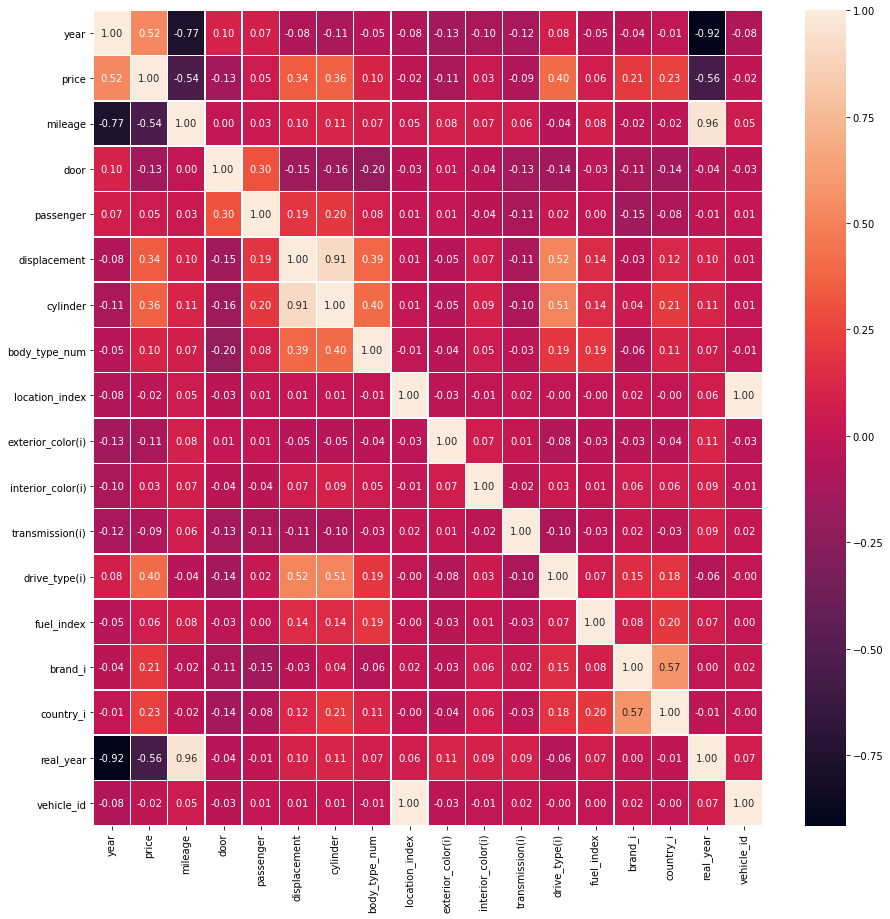

In [104]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

#### 5.2.2 Simple Countplot

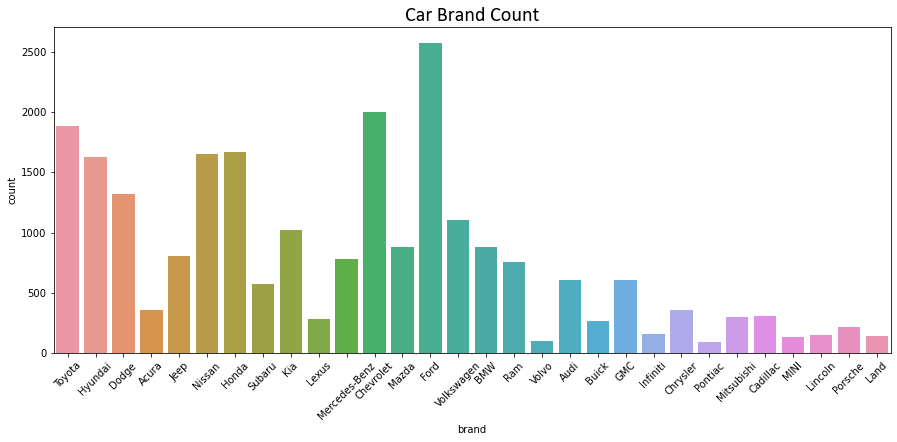

In [105]:
plt.subplots(figsize=(15, 6))
sns.countplot(df_original['brand'])
plt.xticks(rotation=45)
plt.title('Car Brand Count', fontdict = {'fontname':'Calibri', 'fontsize':20})
plt.show()

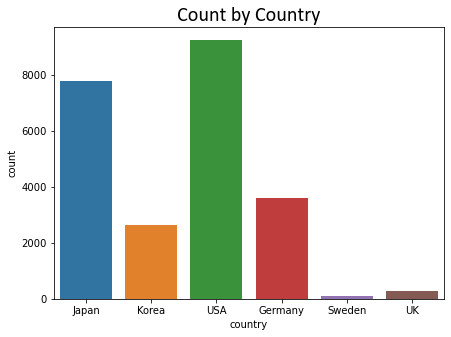

In [106]:
plt.subplots(figsize=(7, 5))
sns.countplot(df_original['country'])
plt.title('Count by Country', fontdict = {'fontname':'Calibri', 'fontsize':20})
plt.show()

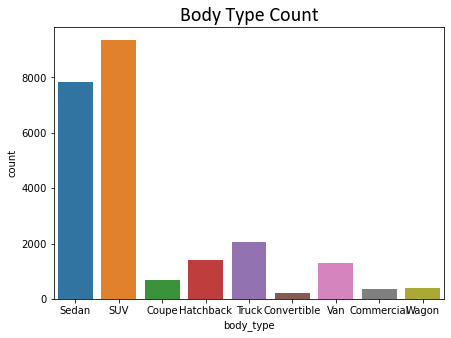

In [107]:
plt.subplots(figsize=(7, 5))
sns.countplot(df_original['body_type'])
plt.title('Body Type Count', fontdict = {'fontname':'Calibri', 'fontsize':20})
plt.show()

### 5.3 Train-Test Split

In [108]:
X = data.drop(columns=['price', 'vehicle_id'])
X

,year,mileage,door,passenger,displacement,cylinder,body_type_num,location_index,exterior_color(i),interior_color(i),transmission(i),drive_type(i),fuel_index,brand_i,country_i,real_year
0,2016,42098,4,5,1.8,4,1.0,0,0,0,0,0,0,0,0,3.75
2,2017,95532,4,5,2.5,4,1.0,0,1,1,0,0,0,0,0,5.48
3,2016,48315,4,5,2.5,4,1.0,0,1,0,0,0,0,0,0,4.01
5,2020,11719,4,5,2.0,4,1.0,0,1,0,0,0,0,2,1,0.49
6,2015,88392,5,7,3.6,6,2.0,0,1,0,0,2,0,1,2,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26263,2008,126182,4,4,4.0,6,5.0,39,4,1,1,3,0,16,2,11.26
26264,2006,250000,4,4,1.8,4,1.0,39,7,0,1,0,0,6,0,17.42
26265,2004,217000,4,4,1.8,4,1.0,39,7,0,0,2,0,20,3,17.04
26266,2007,106402,4,4,2.2,4,1.0,39,1,8,0,0,0,12,2,10.93


In [109]:
y = data['price']
y

0        13888
2        22888
3        19888
5        17988
6        24988
         ...  
26263     6999
26264     3499
26265     4299
26266     3999
26267    10499
Name: price, Length: 23629, dtype: int32

In [110]:
# Holdout Cross validation
# Train, Val, Test
# 60, 20, 20

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#X_train_full is the (60,20) portion of data, need to split again
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [111]:
print('X_Train Shape', X_train.shape)
print('Y_Train Shape', y_train.shape)
print('X_Test Shape', X_test.shape)
print('Y_Test Shape', y_test.shape)
print('X_Val Shape', X_val.shape)
print('Y_Val Shape', y_val.shape)

X_Train Shape (14177, 16)
Y_Train Shape (14177,)
X_Test Shape (4726, 16)
Y_Test Shape (4726,)
X_Val Shape (4726, 16)
Y_Val Shape (4726,)


### 5.4 Model Selection

In [112]:
model = []
score = []

In [113]:
# Linear Regression
lr = LinearRegression()

lr.fit(X_train,y_train)
lr_pred = lr.predict(X_val)

model.append('Multiple Linear Regression')
score.append(r2_score(lr_pred, y_val))
print(r2_score(lr_pred, y_val))

0.1616976546475024


In [114]:
test_mse = mean_squared_error(y_val, lr_pred)
test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_val, lr_pred)
print(f'the test Main Absolute Error is: {test_mae}')

the test Main Absolute Error is: 6196.678326003374


In [115]:
cv_5_results = cross_val_score(lr, X_train_full, y_train_full, cv=5, 
 scoring='neg_mean_squared_error')

In [116]:
cv_5_results

array([-8.33627414e+07, -1.04258185e+08, -1.00440498e+08, -1.10121619e+08,
       -1.02050266e+08])

In [117]:
cv_5_results = cross_val_score(lr, X_train_full, y_train_full, cv=5, 
 scoring='r2')

cv_5_results

array([0.60455735, 0.56080965, 0.57134595, 0.57325033, 0.54540506])

In [118]:
# XG Boost
xgb = XGBRegressor()

xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_val)

model.append('XGBoost Regression')
score.append(r2_score(xgb_pred, y_val))
print(r2_score(xgb_pred, y_val))

0.8905642434023823


In [119]:
cv_5_results = cross_val_score(xgb, X_train_full, y_train_full, cv=5, 
 scoring='r2')

cv_5_results

array([0.90465236, 0.90807591, 0.91065911, 0.92018249, 0.88769644])

In [120]:
test_mse = mean_squared_error(y_val, xgb_pred)
test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_val, xgb_pred)
print(f'the test Main Absolute Error is: {test_mae}')

the test Main Absolute Error is: 2672.081437222694


In [121]:
cv_5_results = cross_val_score(xgb, X_train_full, y_train_full, cv=5, 
 scoring='neg_mean_squared_error')

cv_5_results

array([-20100108.70530997, -21821605.68335634, -20933999.55875869,
       -20596695.88098907, -25210594.38102415])

In [122]:
# Decision Tree
dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)
dt_predict = dt.predict(X_val)

model.append("Decision Tree Regression")
score.append(r2_score(dt_predict, y_val))
print(r2_score(dt_predict, y_val))

0.7749135920718299


In [123]:
cv_5_results = cross_val_score(dt, X_train_full, y_train_full, cv=5, 
 scoring='r2')

cv_5_results

array([0.78571625, 0.78233877, 0.80172829, 0.81518144, 0.7705412 ])

In [124]:
test_mse = mean_squared_error(y_val, dt_predict)
test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_val, dt_predict)
print(f'the test Main Absolute Error is: {test_mae}')

the test Main Absolute Error is: 3902.05179503456


In [125]:
cv_5_results = cross_val_score(dt, X_train_full, y_train_full, cv=5, 
 scoring='neg_mean_squared_error')

cv_5_results

array([-41373622.49403603, -46824770.48766369, -45701166.07187781,
       -47242897.21338309, -51239877.89129953])

In [126]:
# Random Forest
rfr = RandomForestRegressor(n_estimators=100, random_state = 42)

rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_val)

model.append("Random Forest Regression")
score.append(r2_score(rfr_pred, y_val))
print(r2_score(rfr_pred, y_val))

0.8720638127075249


In [127]:
cv_5_results = cross_val_score(rfr, X_train_full, y_train_full, cv=5, 
 scoring='r2')

cv_5_results

array([0.89064702, 0.88754057, 0.89403918, 0.91010663, 0.87626852])

In [128]:
test_mse = mean_squared_error(y_val, rfr_pred)
test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_val, rfr_pred)
print(f'the test Main Absolute Error is: {test_mae}')

the test Main Absolute Error is: 2840.1947566223566


In [129]:
cv_5_results = cross_val_score(rfr, X_train_full, y_train_full, cv=5, 
 scoring='neg_mean_squared_error')

cv_5_results

array([-23052557.4224699 , -26696435.13554049, -24828313.66258009,
       -23196744.74632823, -27776004.41380474])

In [130]:
# Gradient Boost
gbr = GradientBoostingRegressor()

gbr.fit(X_train,y_train)
gbr_pred = gbr.predict(X_val)

model.append("Gradient Boosting Regression")
score.append(r2_score(gbr_pred, y_val))
print(r2_score(gbr_pred, y_val))

0.8149113233074989


In [131]:
cv_5_results = cross_val_score(gbr, X_train_full, y_train_full, cv=5, 
 scoring='r2')

cv_5_results

array([0.85947835, 0.85879647, 0.86311176, 0.88537691, 0.84870594])

In [132]:
test_mse = mean_squared_error(y_val, gbr_pred)
test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_val, gbr_pred)
print(f'the test Main Absolute Error is: {test_mae}')

the test Main Absolute Error is: 3406.8703092154637


In [133]:
cv_5_results = cross_val_score(gbr, X_train_full, y_train_full, cv=5, 
 scoring='neg_mean_squared_error')

cv_5_results

array([-29590976.34686359, -33541727.74456829, -32078185.68011912,
       -29673979.70295284, -33963233.083631  ])

In [134]:
# Ada Boost
abr = AdaBoostRegressor(random_state=0, n_estimators=5)

abr.fit(X_train,y_train)
abr_pred = abr.predict(X_val)

model.append("Ada Boost Regression")
score.append(r2_score(abr_pred, y_val))
print(r2_score(abr_pred, y_val))

0.27540601833440537


In [135]:
cv_5_results = cross_val_score(abr, X_train_full, y_train_full, cv=5, 
 scoring='r2')

cv_5_results

array([0.64059   , 0.63623576, 0.67968283, 0.65654079, 0.56584791])

In [136]:
test_mse = mean_squared_error(y_val, abr_pred)
test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_val, abr_pred)
print(f'the test Main Absolute Error is: {test_mae}')

the test Main Absolute Error is: 6034.458848576477


In [137]:
cv_5_results = cross_val_score(abr, X_train_full, y_train_full, cv=5, 
 scoring='neg_mean_squared_error')

cv_5_results

array([-75766745.24369325, -86352989.02631447, -75055435.38162595,
       -88628738.01104882, -97461130.7660736 ])

In [138]:
# Stacking Decision Tree, Linear Regression, Random Forest
from sklearn.ensemble import StackingRegressor
estimators = [
    ('dt', DecisionTreeRegressor()),
    ('dt2', DecisionTreeRegressor(max_depth=20)),
    ('lr', LinearRegression()),
    ('lr2', LinearRegression(fit_intercept=True)),
    ('rfc', RandomForestRegressor()),
    ('rfc2', RandomForestRegressor(max_depth=20))
]


clf = StackingRegressor(
    estimators=estimators, final_estimator=LinearRegression()
)

clf.fit(X_train, y_train)
clf_pred = clf.predict(X_val)


model.append('Stack Dt, Lr, Rf')
score.append(r2_score(clf_pred, y_val))
print(r2_score(clf_pred, y_val))

0.8768834068090461


In [139]:
cv_5_results = cross_val_score(clf, X_train_full, y_train_full, cv=5, 
 scoring='r2')

cv_5_results

array([0.8895115 , 0.88779058, 0.89205678, 0.90890213, 0.8795073 ])

In [140]:
test_mse = mean_squared_error(y_val,clf_pred)
test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_val, clf_pred)
print(f'the test Main Absolute Error is: {test_mae}')

the test Main Absolute Error is: 2823.8298139035514


In [141]:
cv_5_results = cross_val_score(clf, X_train_full, y_train_full, cv=5, 
 scoring='neg_mean_squared_error')

cv_5_results

array([-23074485.91351489, -26803672.5134563 , -24989418.67114132,
       -23459407.28451779, -27127574.74161233])

In [142]:
# Stacking Gradient Boost, Linear Regression, XGB Boost
estimators = [
    ('gbr', GradientBoostingRegressor()),
    ('gbr2', GradientBoostingRegressor(max_depth=20)),
    ('lr', LinearRegression()),
    ('lr2', LinearRegression(fit_intercept=True)),
    ('xgb', XGBRegressor()),
    ('xgb2', XGBRegressor(max_depth=20))
]

clf1 = StackingRegressor(
    estimators=estimators, final_estimator=LinearRegression()
)

clf1.fit(X_train, y_train)
clf1_pred = clf1.predict(X_val)

model.append('Stack Gbr, Lr, Xgb')
score.append(r2_score(clf1_pred, y_val))
print(r2_score(clf1_pred, y_val))

0.8952283975107813


In [143]:
cv_5_results = cross_val_score(clf1, X_train_full, y_train_full, cv=5, 
 scoring='r2')

cv_5_results

array([0.90411044, 0.90980545, 0.91122017, 0.92395862, 0.8909532 ])

In [144]:
test_mse = mean_squared_error(y_val,clf1_pred)
test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_val, clf1_pred)
print(f'the test Main Absolute Error is: {test_mae}')

the test Main Absolute Error is: 2622.165472221296


In [145]:
cv_5_results = cross_val_score(clf1, X_train_full, y_train_full, cv=5, 
 scoring='neg_mean_squared_error')

cv_5_results

array([-20221350.29661985, -21410676.06523122, -20782885.7718785 ,
       -19595714.0384214 , -24482197.92760573])

In [146]:
model

['Multiple Linear Regression',
 'XGBoost Regression',
 'Decision Tree Regression',
 'Random Forest Regression',
 'Gradient Boosting Regression',
 'Ada Boost Regression',
 'Stack Dt, Lr, Rf',
 'Stack Gbr, Lr, Xgb']

In [147]:
score

[0.1616976546475024,
 0.8905642434023823,
 0.7749135920718299,
 0.8720638127075249,
 0.8149113233074989,
 0.27540601833440537,
 0.8768834068090461,
 0.8952283975107813]

#### Grid Search

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
dtr = DecisionTreeRegressor(random_state=1)
rdf = RandomForestRegressor(random_state=1)
svr_rbf = SVR(kernel='rbf')
regressors = [svr_lin, lr, dtr, rdf]
stregr = StackingRegressor(regressors=regressors, 
                           meta_regressor=svr_rbf)

params = {'dtr_random_state': [1, 5, 10, 20, 40],
          'rdf_random_state': [1, 5, 10, 20, 40],
          'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          'meta_regressor__gamma': [0.1, 1.0, 10.0]}

grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train_full, y_train_full)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

TypeError: __init__() got an unexpected keyword argument 'regressors'

# 6. Model Interpretation

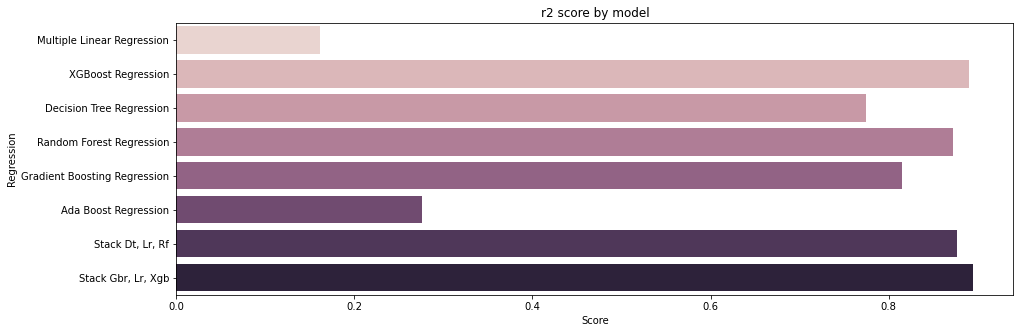

In [148]:
plt.subplots(figsize=(15, 5))

sns.barplot(x=score,y=model,palette = sns.cubehelix_palette(len(score)))

plt.xlabel("Score")
plt.ylabel("Regression")
plt.title('r2 score by model')
plt.show()

#### MLP

In [149]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [150]:
regr = MLPRegressor(random_state=1, max_iter=500)

regr.fit(X_train, y_train)

y_proba = regr.predict(X_test)

result = X_test.copy()

result['predicted_price'] = y_proba

result['true_price'] = y_test

In [151]:
result.head(10)

,year,mileage,door,passenger,displacement,cylinder,body_type_num,location_index,exterior_color(i),interior_color(i),transmission(i),drive_type(i),fuel_index,brand_i,country_i,real_year,predicted_price,true_price
1666,2015,73651,4,4,5.7,8,5.0,2,2,1,0,4,0,7,2,5.57,33631.350115,26995
21868,2017,18555,4,7,3.6,6,7.0,33,2,0,0,0,1,1,2,2.27,28898.166686,26995
4045,2012,189489,4,5,2.5,4,1.0,6,2,0,0,0,0,0,0,11.90,2616.502119,9995
9449,2017,107054,4,5,2.4,4,2.0,15,4,0,0,2,0,9,1,5.96,15518.563311,16998
16171,2015,76000,4,5,2.5,4,2.0,24,1,0,0,0,0,5,0,5.67,14378.667108,13499
20558,2015,78275,4,5,2.4,4,1.0,31,1,0,0,0,1,1,2,5.76,15109.354953,10495
17649,2014,125100,4,6,3.7,6,5.0,26,3,0,0,4,0,16,2,8.21,22538.217575,15980
14385,2017,66287,4,5,1.8,4,4.0,21,1,0,0,0,0,17,3,4.26,19191.596872,13979
18409,2015,50262,2,3,5.7,8,5.0,28,0,0,0,3,0,7,2,4.59,35973.065259,21395
3047,2019,27513,4,5,2.0,4,2.0,4,0,0,0,4,0,5,0,1.65,27958.454338,22900


In [152]:
estimators = [
    ('dt', DecisionTreeRegressor()),
    ('dt2', DecisionTreeRegressor(max_depth=20)),
    ('lr', LinearRegression()),
    ('lr2', LinearRegression(fit_intercept=True)),
    ('rfc', RandomForestRegressor()),
    ('rfc2', RandomForestRegressor(max_depth=20))
]


clf = StackingRegressor(
    estimators=estimators, final_estimator=LinearRegression()
)

clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

result1 = X_test.copy()

result1['predicted_price'] = clf_pred

result1['true_price'] = y_test

In [153]:
result1.head(10)

,year,mileage,door,passenger,displacement,cylinder,body_type_num,location_index,exterior_color(i),interior_color(i),transmission(i),drive_type(i),fuel_index,brand_i,country_i,real_year,predicted_price,true_price
1666,2015,73651,4,4,5.7,8,5.0,2,2,1,0,4,0,7,2,5.57,27679.097187,26995
21868,2017,18555,4,7,3.6,6,7.0,33,2,0,0,0,1,1,2,2.27,23988.966638,26995
4045,2012,189489,4,5,2.5,4,1.0,6,2,0,0,0,0,0,0,11.90,7523.553475,9995
9449,2017,107054,4,5,2.4,4,2.0,15,4,0,0,2,0,9,1,5.96,17505.567741,16998
16171,2015,76000,4,5,2.5,4,2.0,24,1,0,0,0,0,5,0,5.67,13929.611977,13499
20558,2015,78275,4,5,2.4,4,1.0,31,1,0,0,0,1,1,2,5.76,13475.725447,10495
17649,2014,125100,4,6,3.7,6,5.0,26,3,0,0,4,0,16,2,8.21,20365.607486,15980
14385,2017,66287,4,5,1.8,4,4.0,21,1,0,0,0,0,17,3,4.26,15964.463841,13979
18409,2015,50262,2,3,5.7,8,5.0,28,0,0,0,3,0,7,2,4.59,27388.395689,21395
3047,2019,27513,4,5,2.0,4,2.0,4,0,0,0,4,0,5,0,1.65,25989.033279,22900


#### Lime

In [154]:
# MLP Trial
from lime.lime_tabular import LimeTabularExplainer

# Set up Lime object, with Feature/Label names
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values, class_names=['Pred_price'], verbose=True, mode='regression')

customer_id = 3047

exp = explainer.explain_instance(X_test.loc[customer_id], regr.predict, num_features=5)

exp.show_in_notebook()

Intercept 18380.965822242077
Prediction_local [32553.78746698]
Right: 27958.454338456544


In [155]:
result['price difference']=(result['true_price']-result['predicted_price'])/result['true_price']

result['price difference'].abs().mean()

0.36260096077293247

In [156]:
# Stacking Trial

# Set up Lime object, with Feature/Label names
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values, class_names=['Pred_price'], verbose=True, mode='regression')

customer_id = 3047

exp = explainer.explain_instance(X_test.loc[customer_id], clf.predict, num_features=5)

exp.show_in_notebook()

Intercept 22814.486263451414
Prediction_local [30701.18698598]
Right: 25989.033278900944


In [157]:
result1['price difference']=(result1['true_price']-result1['predicted_price'])/result1['true_price']

result1['price difference'].abs().mean()

0.22369372049375716

#### In the end, I chose the clf algorthm which is stacking of linear regression, decision tree and random forest regressor

In [158]:
# Predict Price based on X
car_ids = data['vehicle_id']
predict = clf.predict(X)

#set the output as a dataframe
output = pd.DataFrame({ 'vehicle_id' : car_ids, 'Pred_Price': predict})
output

,vehicle_id,Pred_Price
0,1,14316.316762
2,2,21190.152523
3,3,19842.399147
5,4,18655.020591
6,5,25097.537892
...,...,...
26263,23625,13873.815878
26264,23626,2921.009354
26265,23627,4447.555924
26266,23628,4328.905154


In [159]:
output['Original_price'] = df_original['price']

output

,vehicle_id,Pred_Price,Original_price
0,1,14316.316762,13888
2,2,21190.152523,22888
3,3,19842.399147,19888
5,4,18655.020591,17988
6,5,25097.537892,24988
...,...,...,...
26263,23625,13873.815878,6999
26264,23626,2921.009354,3499
26265,23627,4447.555924,4299
26266,23628,4328.905154,3999


In [160]:
output['Pred_Price']= output['Pred_Price'] //1

In [161]:
output['price difference'] = (output['Original_price'] - output['Pred_Price'])/output['Original_price']

In [162]:
output['price difference'].abs().mean()

0.5442712767257609

In [163]:
output

,vehicle_id,Pred_Price,Original_price,price difference
0,1,14316.0,13888,-0.030818
2,2,21190.0,22888,0.074187
3,3,19842.0,19888,0.002313
5,4,18655.0,17988,-0.037080
6,5,25097.0,24988,-0.004362
...,...,...,...,...
26263,23625,13873.0,6999,-0.982140
26264,23626,2921.0,3499,0.165190
26265,23627,4447.0,4299,-0.034427
26266,23628,4328.0,3999,-0.082271


In [164]:
filter_50 = output['price difference'].abs() > 0.5

output[filter_50]

,vehicle_id,Pred_Price,Original_price,price difference
78,49,15488.0,6395,-1.421892
146,111,18683.0,8995,-1.077043
153,116,57199.0,36985,-0.546546
253,164,3251.0,1995,-0.629574
260,168,22490.0,7495,-2.000667
...,...,...,...,...
26126,23501,13677.0,6999,-0.954136
26145,23519,6777.0,4200,-0.613571
26196,23562,4008.0,2500,-0.603200
26232,23595,7066.0,15900,0.555597


In [165]:
filter_20 = output['price difference'].abs() > 0.2

output[filter_20]

,vehicle_id,Pred_Price,Original_price,price difference
22,17,20586.0,15495,-0.328558
41,32,20751.0,26688,0.222460
44,35,26239.0,38988,0.326998
52,37,23493.0,18888,-0.243806
58,40,8537.0,12288,0.305257
...,...,...,...,...
26250,23612,8005.0,11999,0.332861
26255,23617,14348.0,21404,0.329658
26258,23620,14519.0,18404,0.211095
26259,23621,14392.0,25404,0.433475


### Dataframe For Tableau Analysis

In [166]:
df_original['pred_price'] = output['Pred_Price']

In [167]:
df_original['real_year'] = df_analysis['real_year']

In [168]:
df_original['price_diff'] = output['price difference']

In [169]:
df_original.to_csv(r'C:/Users/james/Desktop/Wecloud_Data_Bootcamp/portfolio_tableau.csv', index = False)

# 7. Real Life Example

#### To be Explained